In [1]:
import string
import random
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import OrderedDict
import numpy as np

# Candidate Hash Functions


In [2]:
def hash(b):
    prime = 101              # The Wikipedia's "ideal" hash function
    basenum = 128
    h = 0
    for i in b:
        h = (((h + prime) * basenum) + ord(i)) % prime
    return (h + prime) % prime

def sum(b):
    h = 0                    # what happens, if we just addup
    for i in b:
        h += ord(i) - 96
    return h

def bighash(b):
    prime = 1300             # what happens, if prime is very big relatively and not prime...!!!
    basenum = 128
    h = 0
    for i in b:
        h = (((h + prime) * basenum) + ord(i)) % prime
    return (h + prime) % prime


# The probability distribution of alphabets is uniform

In [3]:
def word_gen(size, n = 0, random_length=False):
    words = []
    for i in range(size):
        str_len = random.randint(1,100) if random_length else n
        x = ''.join(random.choices(string.ascii_lowercase, k = str_len))
        words.append(x)      
    return words

def sample(hasher, words):         # This is a higher order function, to apply the hasher
    freq = defaultdict(int)
    for i in words:
        freq[hasher(i)] += 1
    return freq

def plot(table):
    a = 1.3 * max(table.values())
    x, y = zip(*sorted(table.items()))
    plt.plot(x, y)
    plt.ylim(ymin=0, ymax = a)
    plt.show()
    return

## If length of string in the sample is constant

In [4]:
# For fixed length
size = 100000
n = 100

words = word_gen(size, n)
hash_uniform = sample(hash, words)
sum_uniform = sample(sum, words)
big_uniform = sample(bighash, words)

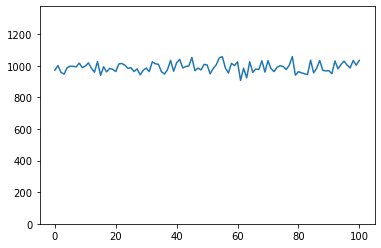

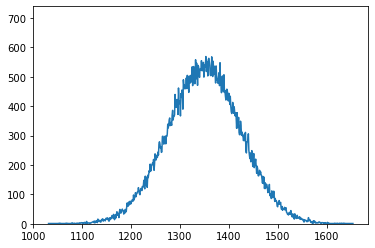

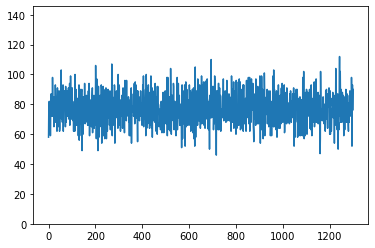

In [5]:
plot(hash_uniform)
plot(sum_uniform)
plot(big_uniform)

## If length of string in the sample is variable

In [6]:
# For random length string
words_random = word_gen(size, random_length=True)
hash_random = sample(hash, words_random)
sum_random = sample(sum, words_random)
big_random = sample(bighash, words_random)

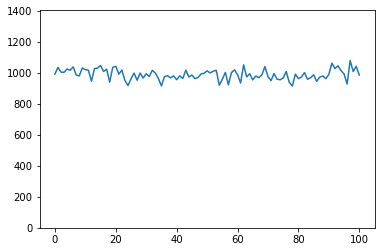

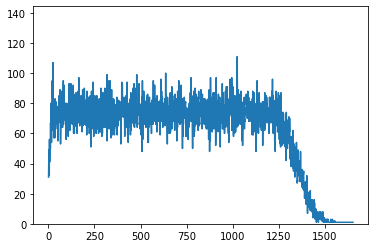

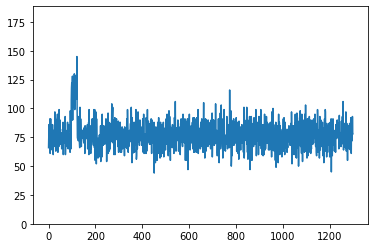

In [7]:
plot(hash_random)
plot(sum_random)
plot(big_random)

# The probability distribution of alphabets is adjusted to zif's law

In [8]:

def zif_gen(size, n = 0, random_length=False):
    # key/val pairs, ascii code / prob, this  the probability distribution
    freq = OrderedDict({101: 0.12702, 116: 0.09055999999999999, 97: 0.08166999999999999, 
                        111: 0.07507, 105: 0.06966, 110: 0.06749, 115: 0.06326999999999999, 
                        104: 0.06094, 114: 0.05987, 100: 0.04253, 108: 0.04025, 99: 0.02782,
                        117: 0.02758, 109: 0.02406, 119: 0.0236, 102: 0.02228, 103: 0.02015, 
                        121: 0.01974, 112: 0.01929, 98: 0.01492, 118: 0.00978, 107: 0.00772, 
                        106: 0.00153, 120: 0.0015, 113: 0.00095, 122: 0.00074})
    words = []
    for i in range(size):
        str_len = random.randint(1,100) if random_length else n
        key = list(freq.keys())
        prb = np.array(list(freq.values()))
        prb /= prb.sum()                     # Doing this so that prob add up to 1
        
        chars = list(np.random.choice(list(freq.keys()), p = prb, size = str_len))
        x = "".join([chr(i) for i in chars])
        words.append(x)
    return words

## If length of string in the sample is constant

In [9]:
zif_words = zif_gen(size, n)

hash_zif = sample(hash, zif_words)
sum_zif = sample(sum, zif_words)
big_zif = sample(bighash, zif_words)

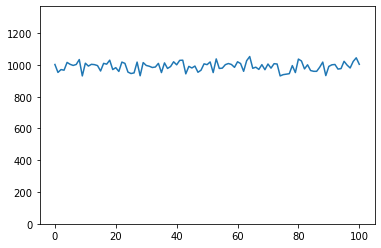

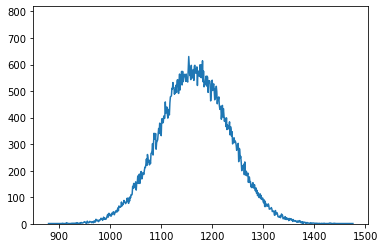

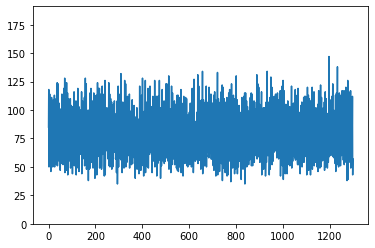

In [10]:
plot(hash_zif)
plot(sum_zif)
plot(big_zif)

## If length of string in the sample is variable

In [11]:
zif_random = zif_gen(size, random_length=True)

hash_zif_random = sample(hash, zif_random)
sum_zif_random = sample(sum, zif_random)
big_zif_random = sample(bighash, zif_random)

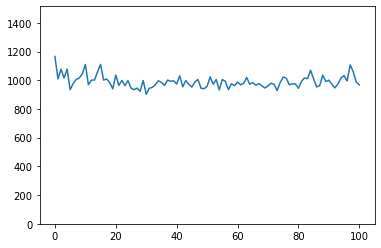

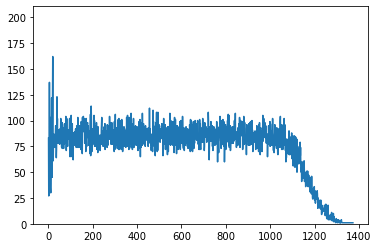

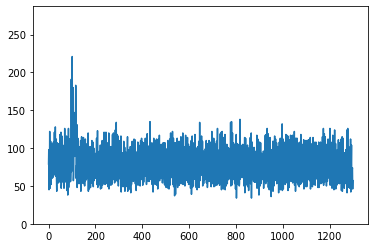

In [12]:
plot(hash_zif_random)
plot(sum_zif_random)
plot(big_zif_random)

# Checks

In [13]:
# zif_gen() is working ✅

e = z = 0
for i in zif_words:
    if i[0] == "e":
        e += 1
    if i[0] == "z":
        z += 1
print(e / len(zif_words))
print(z / len(zif_words))


0.12932
0.00066


In [14]:
# For future reference

freq = OrderedDict({
        "e": 12.702, "t": 9.056, "a": 8.167, "o": 7.507, "i": 6.966,
        "n": 6.749, "s": 6.327, "h": 6.094, "r": 5.987, "d": 4.253, 
        "l": 4.025, "c": 2.782, "u": 2.758, "m": 2.406, "w": 2.360, 
        "f": 2.228, "g": 2.015, "y": 1.974, "p": 1.929, "b": 1.492, 
        "v": 0.978, "k": 0.772, "j": 0.153, "x": 0.150, "q": 0.095, 
        "z": 0.074
})
new = {}
for i in freq:
    new[ord(i)] = freq[i]/100
s= 0 
for i in new:
    s += new[i]
s

0.9999899999999998

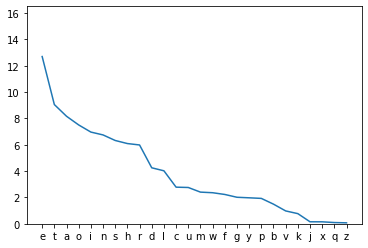

In [15]:
# zif's law

a = 1.3 * max(freq.values())
x, y = zip(*list(freq.items()))
plt.plot(x, y)
plt.ylim(ymin=0, ymax = a)
plt.show()
